In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import imblearn
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [4]:
## read the cleaned dataset
df = pd.read_csv('cleaning.csv', index_col = 0)
df['y'] = df.y.eq('yes').mul(1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,cellular,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,cellular,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,cellular,5,may,76,1,-1,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,cellular,5,may,92,1,-1,0,0
4,33,management,single,tertiary,0,1,0,0,cellular,5,may,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,0


In [5]:
## resampling
# Separate majority and minority classes
df_minority = df[df['y']==1]
df_majority = df[df['y']==0]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=39922)
#Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=39922)
# Combine minority class with downsampled majority class
df_up_down_sampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

In [6]:
df = df_up_down_sampled

In [7]:
df['y'].value_counts()

0    39922
1    39922
Name: y, dtype: int64

In [8]:
df['y'].value_counts()

0    39922
1    39922
Name: y, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79844 entries, 4301 to 21203
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        79844 non-null  int64 
 1   job        79844 non-null  object
 2   marital    79844 non-null  object
 3   education  79844 non-null  object
 4   default    79844 non-null  int64 
 5   balance    79844 non-null  int64 
 6   housing    79844 non-null  int64 
 7   loan       79844 non-null  int64 
 8   contact    79844 non-null  object
 9   day        79844 non-null  int64 
 10  month      79844 non-null  object
 11  duration   79844 non-null  int64 
 12  campaign   79844 non-null  int64 
 13  pdays      79844 non-null  int64 
 14  previous   79844 non-null  int64 
 15  y          79844 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 10.4+ MB


In [10]:
df = pd.get_dummies(df, columns = ['job', 'marital', 'education', 'contact', 'month'], drop_first = True)

In [11]:
## split test train data set, using stratify for balancing data type
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], test_size=0.3, random_state=42, shuffle=True,stratify=df['y'])

In [12]:
y_train.value_counts()

0    27945
1    27945
Name: y, dtype: int64

In [14]:
## Train models
acc = []
pre = []
recall_list = []

## Logistic Regression
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
acc.append(accuracy)
pre.append(precision)
recall_list.append(recall)
print('Logistic Regression')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
## Random Forest
rm = RandomForestClassifier(n_estimators=300)
rm.fit(X_train, y_train)
prediction = rm.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
acc.append(accuracy)
pre.append(precision)
recall_list.append(recall)
print('Random Forest')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
## SVM
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)
prediction = DecisionTree.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
acc.append(accuracy)
pre.append(precision)
recall_list.append(recall)
print('Support Vector Machine')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Logistic Regression
Accuracy: 0.8099691074559573
Precision: 0.8115820394460763
Recall: 0.8073808132253486
Random Forest
Accuracy: 0.9643065876262837
Precision: 0.933843033234514
Recall: 0.9994155464640561
Support Vector Machine
Accuracy: 0.955623277949403
Precision: 0.919575580501307
Recall: 0.9985806128412791


In [46]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
df_metrics = pd.DataFrame(columns = ['Accuracy','Precision','Recall'], data = [acc, pre, recall_list], \
                          index = models)
df_metrics

,Accuracy,Precision,Recall
Logistic Regression,0.809969,0.964307,0.955623
Random Forest,0.811582,0.933843,0.919576
Decision Tree,0.807381,0.999416,0.998581


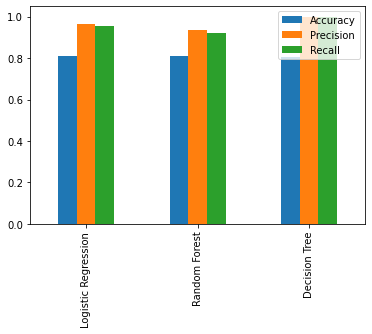

In [47]:
df_metrics.plot(kind='bar')
plt.legend(loc = 'upper right')